## Manually Calculating Retention

Retention is, without question, a top 5 KPI that is tracked for user analytics. Retention is a measure of how long your users or accounts stick around after they first join.

Retention is often higlighted in analytics tools as drag 'n drop. But have you ever wondered how it's calculated in the first place?

Learning to calculate retention manually is like chopping down your own tree before you turn it into a table. You won't need to do this all the time, but when you do, you'll be glad you had.

So let's wax on/wax off grasshopper and see how this is done...

**Goal: Calculate user retention for a fictional b2c app**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We are going to be working with a fictional dataset

In [101]:
df = pd.read_csv('../data/RetentionDataset.csv', parse_dates=['day'])

In [102]:
# Get the first day a user was active

start_date = df.groupby('user_id')['day'].min()
start_date = start_date.rename("start_day")

In [103]:
# Join start date
df = pd.merge(df, start_date, left_on='user_id', right_index=True)

df['days_since_start'] = (df['day'] - df['start_day']).dt.days

In [104]:
# Extract start week
df['start_week'] = df.apply(lambda x: (x['start_day'] - pd.Timedelta(x['start_day'].dayofweek, u='day')).date(), axis=1)

In [120]:
# Extract start month
df['start_month'] = df['start_day'].values.astype('datetime64[M]')

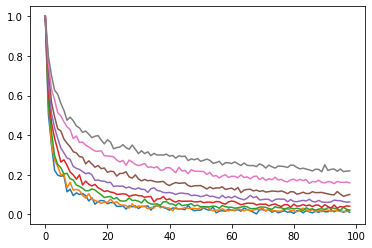

In [117]:
# Do a loop up here

for month in df['start_month'].unique():
    dfc = df[df['start_month']==pd.to_datetime(month)]

    retention_cohort = dfc.groupby('days_since_start')['user_id'].nunique() / dfc['user_id'].nunique()
    plt.plot(retention_cohort);